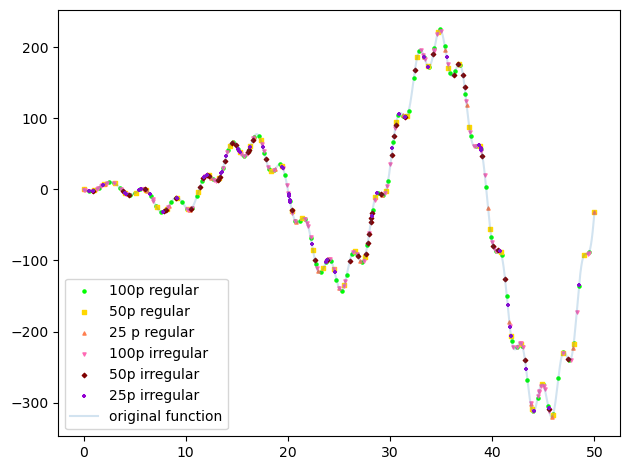

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.interpolate as interpolate

def function(x):                                                    # GENERATE EXACT FUNCTION 
    return (x**(3/2))*(np.sin(x**(3/4)) - (4/(x+0.000001))*np.cos(x**(5/4))) 
    

N = 25

fig, ax = plt.subplots()

# 6 DIFERENT SAMPLES
# 1) 100 points, SAME STEP
x1 = np.linspace(0, 50, 4*N)
y1 = function(x1)
ax.scatter(x1, y1, s=5, marker='o', color='lime', label="100p regular")
# 2) 50 points, SAME STEP
x2 = np.linspace(0, 50, 2*N)
y2 = function(x2)
ax.scatter(x2, y2, s=5, marker='s', color='gold', label="50p regular")
# 3) 25 points, SAME STEP
x3 = np.linspace(0, 50, N)
y3 = function(x3)
ax.scatter(x3, y3, s=5, marker='^', color='coral', label="25 p regular")
# 4) 100 points, random samples
x4 = np.random.uniform(0,50, size=4*N)
y4 = function(x4)
ax.scatter(x4, y4, s=5, marker='v', color='hotpink', label="100p irregular")
# 5) 50 points, random samples
x5 = np.random.uniform(0,50, size=2*N)
y5 = function(x5)
ax.scatter(x5, y5, s=5, marker='D', color='maroon', label="50p irregular")
# 5) 50 points, random samples
x6 = np.random.uniform(0,50, size=2*N)
y6 = function(x6)
ax.scatter(x6, y6, s=5, marker='+', color='darkviolet', label="25p irregular")




x_fine = np.linspace(0, 50, 10000*N)
ax.plot(x_fine, function(x_fine), ls="-", alpha=0.2,label="original function")


ax.legend(frameon=False, loc="best")


plt.legend()
plt.grid(False)
    
plt.tight_layout()
plt.show()

    

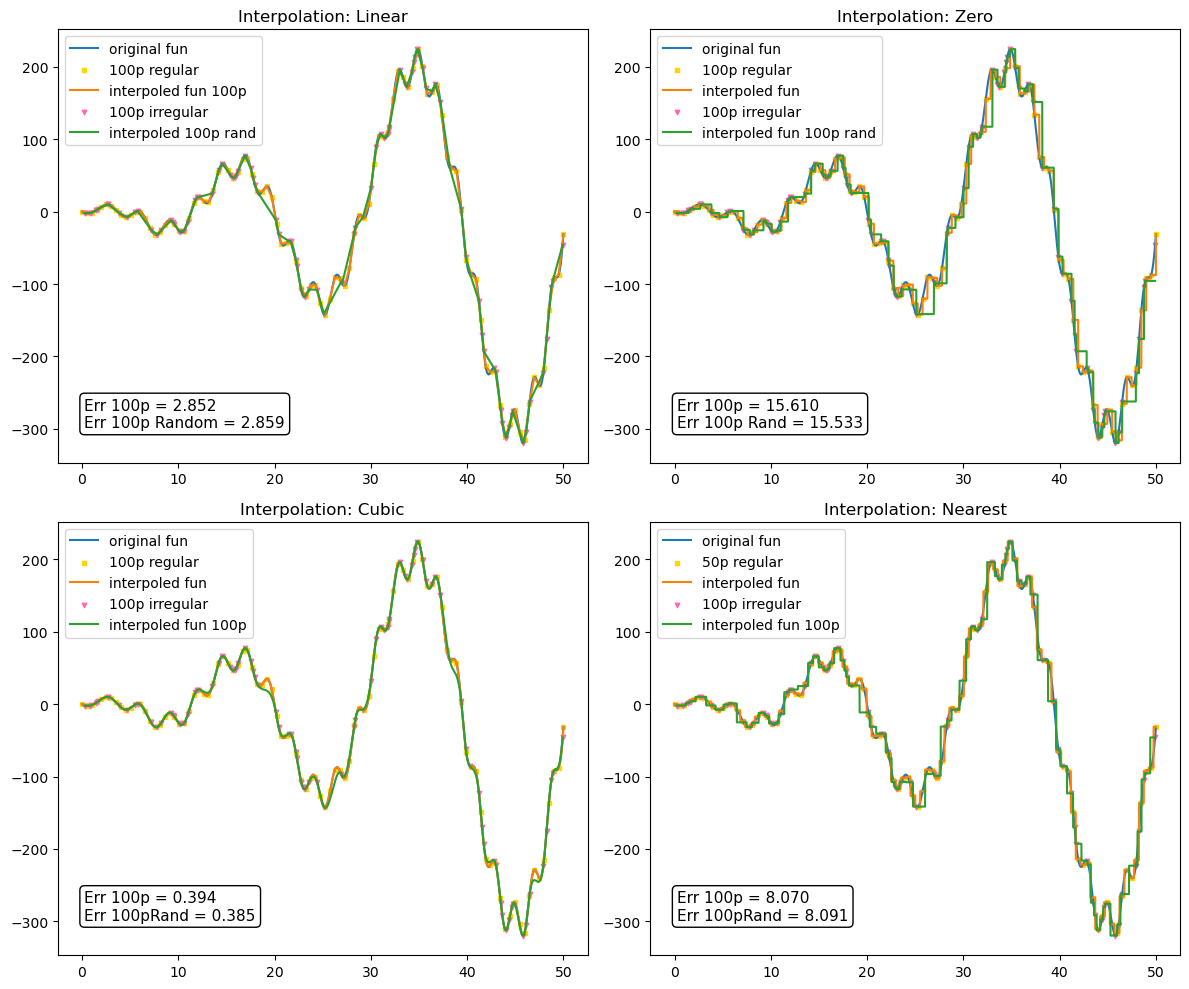

In [4]:

fig = plt.figure(figsize=(12, 10))

# 1  Linear
ax1 = fig.add_subplot(221)

ax1.plot(x_fine, function(x_fine), ls="-", label="original fun")
x2 = np.linspace(0, 50, 4*N)
y2 = function(x2)
ax1.scatter(x2, y2, s=10, marker='s', color='gold', label="100p regular")
f_interp = interpolate.interp1d(x2, y2, kind="linear")
ax1.plot(x_fine, f_interp(x_fine), ls="-",label="interpoled fun 100p")

linear100_err = np.std(function(x_fine)-f_interp(x_fine))

x4 = np.random.uniform(0,50, size=4*N)
y4 = function(x4)
x_fine_valid = x_fine[(x_fine >= x4.min()) & (x_fine <= x4.max())]    # I DO THIS TO AVOID ERRORS IN THE INTERPOLATION (x_fine < MINIMUM VALUE OF x4, idem for max)

ax1.scatter(x4, y4, s=10, marker='v', color='hotpink', label="100p irregular")
f_interp2 = interpolate.interp1d(x4, y4, kind="linear")
ax1.plot(x_fine_valid, f_interp2(x_fine_valid), ls="-",label="interpoled 100p rand")

linear100rand_err = np.std(function(x_fine_valid)-f_interp(x_fine_valid))

ax1.text(0.05, 0.15,f"Err 100p = {linear100_err:.3f}\nErr 100p Random = {linear100rand_err:.3f}",transform=ax1.transAxes,fontsize=11,verticalalignment="top",bbox=dict(boxstyle="round", fc="white", ec="black"))


ax1.set_title("Interpolation: Linear")
ax1.legend()

# 2 
ax2 = fig.add_subplot(222)

ax2.plot(x_fine, function(x_fine), ls="-", label="original fun")
ax2.scatter(x2, y2, s=10, marker='s', color='gold', label="100p regular")
f_interp = interpolate.interp1d(x2, y2, kind="zero")
ax2.plot(x_fine, f_interp(x_fine), ls="-",label="interpoled fun")
zero100_err = np.std(function(x_fine)-f_interp(x_fine))



ax2.scatter(x4, y4, s=10, marker='v', color='hotpink', label="100p irregular")
f_interp2 = interpolate.interp1d(x4, y4, kind="zero")
ax2.plot(x_fine_valid, f_interp2(x_fine_valid), ls="-",label="interpoled fun 100p rand")

zero100rand_err = np.std(function(x_fine_valid)-f_interp(x_fine_valid))

ax2.text(0.05, 0.15,f"Err 100p = {zero100_err:.3f}\nErr 100p Rand = {zero100rand_err:.3f}",transform=ax2.transAxes,fontsize=11,verticalalignment="top",bbox=dict(boxstyle="round", fc="white", ec="black"))


ax2.set_title("Interpolation: Zero")
ax2.legend()

# 3 
ax3 = fig.add_subplot(223)

ax3.plot(x_fine, function(x_fine), ls="-", label="original fun")
ax3.scatter(x2, y2, s=10, marker='s', color='gold', label="100p regular")
f_interp = interpolate.interp1d(x2, y2, kind="cubic")
ax3.plot(x_fine, f_interp(x_fine), ls="-",label="interpoled fun")
cubic100_err = np.std(function(x_fine)-f_interp(x_fine))

ax3.scatter(x4, y4, s=10, marker='v', color='hotpink', label="100p irregular")
f_interp2 = interpolate.interp1d(x4, y4, kind="cubic")
ax3.plot(x_fine_valid, f_interp2(x_fine_valid), ls="-",label="interpoled fun 100p")

cubic100rand_err = np.std(function(x_fine_valid)-f_interp(x_fine_valid))

ax3.text(0.05, 0.15,f"Err 100p = {cubic100_err:.3f}\nErr 100pRand = {cubic100rand_err:.3f}",transform=ax3.transAxes,fontsize=11,verticalalignment="top",bbox=dict(boxstyle="round", fc="white", ec="black"))

ax3.set_title("Interpolation: Cubic")
ax3.legend()

# 3 
ax4 = fig.add_subplot(224)

ax4.plot(x_fine, function(x_fine), ls="-",label="original fun")
ax4.scatter(x2, y2, s=10, marker='s', color='gold', label="50p regular")
f_interp = interpolate.interp1d(x2, y2, kind="nearest")
ax4.plot(x_fine, f_interp(x_fine), ls="-",label="interpoled fun")
nearest100_err = np.std(function(x_fine)-f_interp(x_fine))

ax4.scatter(x4, y4, s=10, marker='v', color='hotpink', label="100p irregular")
f_interp2 = interpolate.interp1d(x4, y4, kind="nearest")
ax4.plot(x_fine_valid, f_interp2(x_fine_valid), ls="-",label="interpoled fun 100p")

nearest100rand_err = np.std(function(x_fine_valid)-f_interp(x_fine_valid))

ax4.text(0.05, 0.15,f"Err 100p = {nearest100_err:.3f}\nErr 100pRand = {nearest100rand_err:.3f}",transform=ax4.transAxes,fontsize=11,verticalalignment="top",bbox=dict(boxstyle="round", fc="white", ec="black"))


ax4.set_title("Interpolation: Nearest")
ax4.legend()


plt.grid(False) 
plt.tight_layout()
plt.show()
